<a href="https://colab.research.google.com/github/ranjithdurgunala/ML-LAB-2025-2026/blob/main/K_Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-Means clustering** is a popular unsupervised learning algorithm used for clustering. Its goal is to group a given dataset into a specified number ('k') of clusters. The main idea is that data points within the same cluster are similar to each other, and data points in different clusters are dissimilar.

The "means" in K-Means refers to the centroids (the average location or "center" of a cluster), which are used to define the cluster's position.

**How the Algorithm Works**

The algorithm works iteratively in a few simple steps to find the best cluster groupings.

***Choose 'k':*** First, you must decide how many clusters (k) you want to find. This is a crucial parameter that you provide to the algorithm.

***Initialize Centroids:*** The algorithm randomly places 'k' points (the centroids) in the feature space. These serve as the initial "guesses" for the center of each cluster.


***Assign Points (Assignment Step):*** The algorithm goes through each data point and calculates its distance to every one of the 'k' centroids (usually using Euclidean distance). Each data point is then assigned to the cluster of its nearest centroid.


***Update Centroids (Update Step):*** Once all data points are assigned to a cluster, the algorithm recalculates the position of the 'k' centroids. The new position for a centroid is the mean (average) of all the data points assigned to its cluster.

***Repeat: ***The algorithm repeats Steps 3 and 4 (Assignment and Update) iteratively. Points get reassigned to the new, updated centroids, and then the centroids are updated again based on their new points.


This process continues until the algorithm converges, which means the cluster assignments stop changing and the centroids no longer move significantly.

Cluster assignments (first 10): [3 3 0 1 3 1 2 1 0 2]
Location of cluster centers:
 [[ 0.14925657  0.9914829 ]
 [-0.65869976 -1.56539998]
 [ 1.54816445 -0.13367465]
 [-1.03872126  0.70759172]]


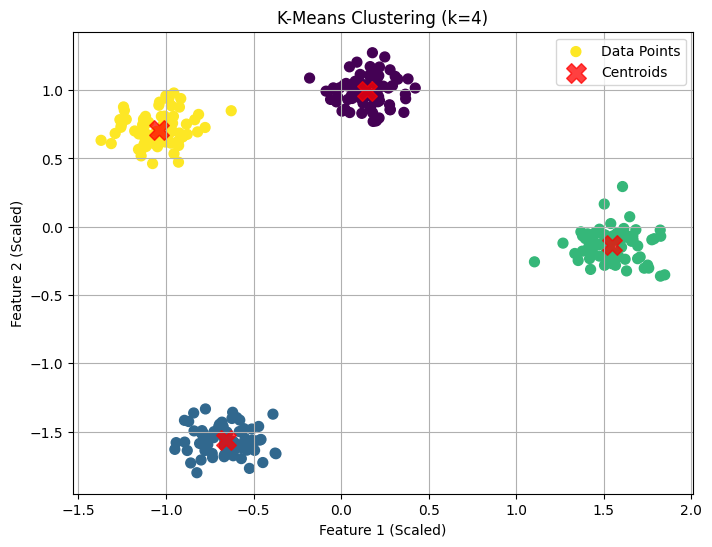

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Generate Sample Data
# We create synthetic data with 300 samples, 2 features (for 2D plotting),
# and 4 distinct centers (clusters). random_state ensures reproducibility.
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.70, random_state=42)

# 2. Scale the Data (Good Practice)
# While not always strictly necessary for K-Means with 'make_blobs',
# scaling is crucial if your features are on different scales (e.g., age vs. salary).
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Create and Train the K-Means Model
# We tell the model we are looking for 4 clusters (n_clusters=4).
# n_init='auto' is the modern default, running the algorithm multiple times
# with different centroid seeds to find the best result.
kmeans = KMeans(n_clusters=4, n_init='auto', random_state=42)

# Fit the model and predict the cluster for each data point
y_kmeans = kmeans.fit_predict(X_scaled)

# 4. Get Cluster Information
# The cluster assignments for each point are in y_kmeans
# The final cluster centers (centroids) are stored in 'cluster_centers_'
centers = kmeans.cluster_centers_

print("Cluster assignments (first 10):", y_kmeans[:10])
print("Location of cluster centers:\n", centers)

# 5. Visualize the Results
plt.figure(figsize=(8, 6))

# Plot the data points, colored by their assigned cluster
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis', label='Data Points')

# Plot the cluster centers (centroids)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

plt.title('K-Means Clustering (k=4)')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.grid(True)
plt.show()